<a href="https://colab.research.google.com/github/abhisihebat/machine1/blob/main/UTS1_G_231_21_0029.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn

from google.colab import files
uploader = files.upload()


Saving CADdataset1.csv to CADdataset1 (1).csv


In [8]:
# dataset
disease_df = pd.read_csv("CADdataset1.csv")
disease_df.drop(['Age'], inplace = True, axis = 1)
disease_df.rename(columns ={'Sex':'Sex_Fmale'}, inplace = True)

# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.CAD.value_counts())

  Weight Height Sex_Fmale          BMI DM HTN Current Smoker Obesity DLP   BP  \
0     90    175      Male   29.3877551  0   1              1       Y   Y  110   
1     70    157     Fmale    28.398718  0   1              0       Y   N  140   
2     54    164      Male  20.07733492  0   0              1       N   N  100   
3     67    158     Fmale  26.83864765  0   1              0       Y   N  100   
4     87    153     Fmale  37.16519287  0   1              0       Y   N  110   

   ... LVH PRP    FBS   ESR    EF  RWMA EX-Smoker   CR   BUN     CAD  
0  ...   N   N   90.0   7.0  50.0   0.0       0.0  0.7   8.0     Cad  
1  ...   N   N   80.0  26.0  40.0   4.0       0.0  1.0  30.0     Cad  
2  ...   N   N   85.0  10.0  40.0   2.0       0.0  1.0  17.0     Cad  
3  ...   N   N   78.0  76.0  55.0   0.0       0.0  1.2  30.0  Normal  
4  ...   N   N  104.0  27.0  50.0   0.0       0.0  1.0  16.0  Normal  

[5 rows x 26 columns] (303, 26)
Cad       216
Normal     87
Name: CAD, dtype: int64


In [12]:
X = np.asarray(disease_df[['Weight', 'Height', 'BMI',
                          'FBS', 'ESR', 'EF']])
y = np.asarray(disease_df['EX-Smoker'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (212, 6) (212,)
Test set: (91, 6) (91,)


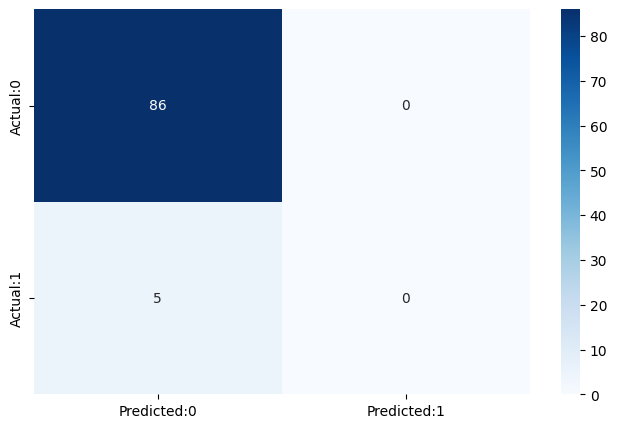

The details for confusion matrix is =
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        86
         1.0       0.00      0.00      0.00         5

    accuracy                           0.95        91
   macro avg       0.47      0.50      0.49        91
weighted avg       0.89      0.95      0.92        91



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                             columns = ['Predicted:0', 'Predicted:1'],
                             index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues")
plt.show()
print('The details for confusion matrix is =')
print (classification_report (y_test, y_pred))